# 3. 주차장 확보율

In [1]:
import requests
import pandas as pd

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("./accessibility_data/seoul_parkinglot.csv")
df.head()

,자치구별(1),자치구별(2),2011,2011.1,2011.2,2012,2012.1,2012.2,2013,2013.1,...,2019.2,2020,2020.1,2020.2,2021,2021.1,2021.2,2022,2022.1,2022.2
0,자치구별(1),자치구별(2),자동차등록대수 (대),주차면수 (면수),주차장확보율 (%),자동차등록대수 (대),주차면수 (면수),주차장확보율 (%),자동차등록대수 (대),주차면수 (면수),...,주차장확보율 (%),자동차등록대수 (대),주차면수 (면수),주차장확보율 (%),자동차등록대수 (대),주차면수 (면수),주차장확보율 (%),자동차등록대수 (대),주차면수 (면수),주차장확보율 (%)
1,총계,소계,2977599,3595750,120.8,2969184,3584262,120.7,2973877,3760461,...,136.1,3157353,4327614,137.1,3176736,4354516,137,3193349,4501875,140.9766
2,총계,종로구,52047,89180,171.3,51521,90434,175.5,50476,86308,...,190.5,50266,95048,189.1,50347,96350,191,50336,92062,182.89495
3,총계,중구,61378,101128,164.8,64816,101956,157.3,57531,106580,...,207.6,51128,107738,210.7,61159,108561,178,58837,109153,185.51762
4,총계,용산구,76714,104741,136.5,76131,105518,138.6,75771,107448,...,148.4,78995,116870,147.9,79740,110649,139,75505,118632,157.11807


In [3]:
df2 = df.loc[:, ['자치구별(2)', '2022', '2022.1','2022.2']]
df2.head()

,자치구별(2),2022,2022.1,2022.2
0,자치구별(2),자동차등록대수 (대),주차면수 (면수),주차장확보율 (%)
1,소계,3193349,4501875,140.9766
2,종로구,50336,92062,182.89495
3,중구,58837,109153,185.51762
4,용산구,75505,118632,157.11807


In [4]:
df2 = df2.rename(columns = {'자치구별(2)':'자치구', '2022':'자동차등록대수 (대)', '2022.1':'주차면수 (면수)', '2022.2':'주차장확보율 (%)'})
df2 = df2.drop(0)
df2.head()

,자치구,자동차등록대수 (대),주차면수 (면수),주차장확보율 (%)
1,소계,3193349,4501875,140.9766
2,종로구,50336,92062,182.89495
3,중구,58837,109153,185.51762
4,용산구,75505,118632,157.11807
5,성동구,104434,134544,128.83161


In [6]:
df2 = df2.drop(1).reset_index(drop = True)
df2.head()

,자치구,자동차등록대수 (대),주차면수 (면수),주차장확보율 (%)
0,종로구,50336,92062,182.89495
1,중구,58837,109153,185.51762
2,용산구,75505,118632,157.11807
3,성동구,104434,134544,128.83161
4,광진구,98535,134389,136.38707


In [9]:
df_gangnam = df2[df2['자치구'] == '강남구']
df_gangnam

,자치구,자동차등록대수 (대),주차면수 (면수),주차장확보율 (%)
22,강남구,248320,413898,166.67928


In [14]:
df2 = df2.astype({'자동차등록대수 (대)':'int', '주차면수 (면수)':'int', '주차장확보율 (%)':'float'})

In [16]:
df2['주차장확보율 (%)'] = round(df2['주차장확보율 (%)'], 2)
df2.head()

,자치구,자동차등록대수 (대),주차면수 (면수),주차장확보율 (%)
0,종로구,50336,92062,182.89
1,중구,58837,109153,185.52
2,용산구,75505,118632,157.12
3,성동구,104434,134544,128.83
4,광진구,98535,134389,136.39


In [17]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   자치구          25 non-null     object 
 1   자동차등록대수 (대)  25 non-null     int64  
 2   주차면수 (면수)    25 non-null     int64  
 3   주차장확보율 (%)   25 non-null     float64
dtypes: float64(1), int64(2), object(1)
memory usage: 928.0+ bytes


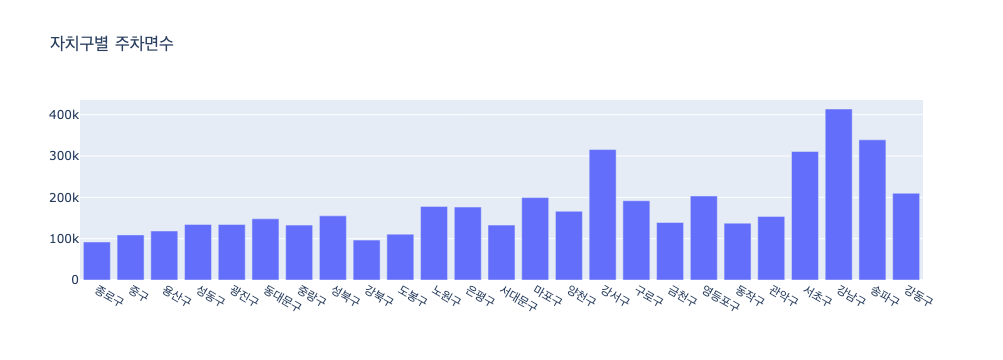

In [19]:
import plotly.graph_objects as go

fig = go.Figure()

fig.add_trace(go.Bar(x = df2['자치구'], y = df2['주차면수 (면수)']))
fig.update_layout(title = '자치구별 주차면수')

fig.show()

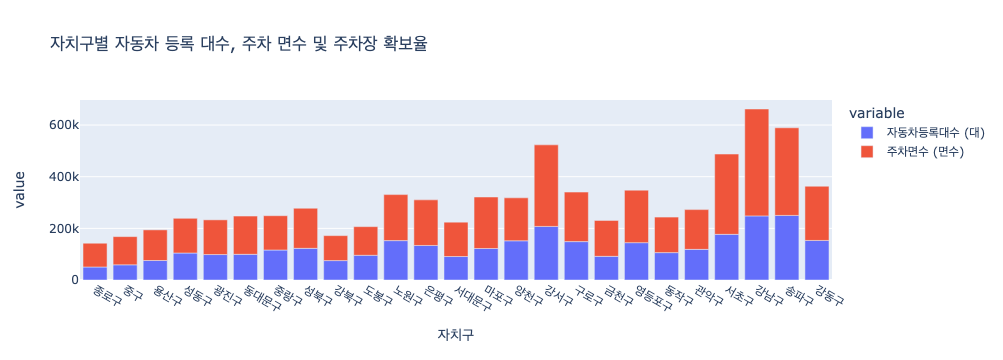

In [22]:
import plotly.express as px

fig = px.bar(df2, x='자치구', y=['자동차등록대수 (대)', '주차면수 (면수)'],
             title='자치구별 자동차 등록 대수, 주차 면수 및 주차장 확보율')


fig.show()

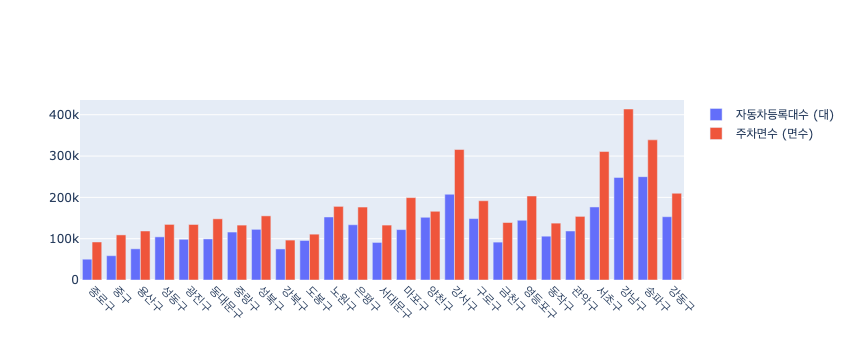

In [35]:
fig = go.Figure()

fig.add_trace(go.Bar(x=df2['자치구'], y=df2['자동차등록대수 (대)'], name='자동차등록대수 (대)'))
fig.add_trace(go.Bar(x=df2['자치구'], y=df2['주차면수 (면수)'], name='주차면수 (면수)'))

fig.update_xaxes(tickangle=45)

fig.show()

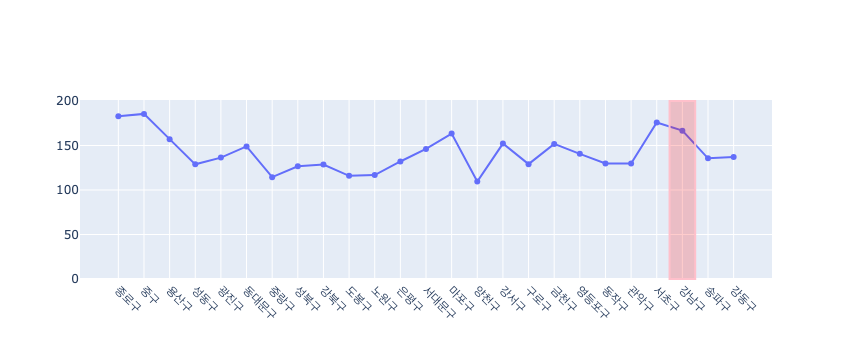

In [48]:
fig = go.Figure()
fig.add_trace(go.Scatter(x = df2['자치구'], y=df2['주차장확보율 (%)'], mode = 'lines+markers', name ='주차장확보율 (%)'))
fig.update_xaxes(tickangle = 45)

highlight_start = 21.5
highlight_end = 22.5
fig.add_shape(type='rect',
             x0 = highlight_start, y0 = 0,
             x1 = highlight_end, y1 = 200,
             fillcolor = 'rgba(255, 0, 0, 0.2)',
             line=dict(color='pink', width=2))

fig.show()